# Global Power Plant Database Problem Statement:
    
    Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5] country_long (text): longer form of the country designation name (text): name or title of the power plant, generally in Romanized form gppd_idnr (text): 10 or 12 character identifier for the power plant capacity_mw (number): electrical generating capacity in megawatts latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326) longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326) primary_fuel (text): energy source used in primary electricity generation or export other_fuel1 (text): energy source used in electricity generation or export other_fuel2 (text): energy source used in electricity generation or export other_fuel3 (text): energy source used in electricity generation or export commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available owner (text): majority shareholder of the power plant, generally in Romanized form source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form url (text): web document corresponding to the source field geolocation_source (text): attribution for geolocation information wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database. year_of_capacity_data (number): year the capacity information was reported generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013 generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014 generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015 generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016 generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017 generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018 generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019 generation_data_source (text): attribution for the reported generation information estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013 estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014 estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015 estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016 estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017 'estimated_generation_note_2013(text): label of the model/method used to estimate generation for the year 2013estimated_generation_note_2014(text): label of the model/method used to estimate generation for the year 2014 estimated_generation_note_2015(text): label of the model/method used to estimate generation for the year 2015estimated_generation_note_2016(text): label of the model/method used to estimate generation for the year 2016estimated_generation_note_2017estimated_generation_note_2018estimated_generation_note_2019` (text): label of the model/method used to estimate generation for the year 2017 Fuel Type Aggregation We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction :  Primary Fuel and capacity_mw 

# IMPORTING LIBRARIES

In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# GETTING THE DATASET

In [63]:
df=pd.read_csv('global_power_plant_database1.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# EDA

In [64]:
df.shape

(907, 27)

In [65]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [66]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [67]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# DROPPING DUPLICATES

In [68]:
df1=df.drop_duplicates()
df1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [69]:
df1.shape

(907, 27)

In [70]:
df1.duplicated().sum()

0

In [71]:
df1.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# CONVERTING OBJECT DATA INTO FLOAT TO GET SAME DATA

In [72]:
from sklearn.preprocessing import OrdinalEncoder
ordin=OrdinalEncoder()

In [73]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=ordin.fit_transform(df1[i].values.reshape(-1,1))

In [74]:
df1.dtypes

country                     float64
country_long                float64
name                        float64
gppd_idnr                   float64
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                float64
other_fuel1                 float64
other_fuel2                 float64
other_fuel3                 float64
commissioning_year          float64
owner                       float64
source                      float64
url                         float64
geolocation_source          float64
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source      float64
estimated_generation_gwh    float64
dtype: object

In [75]:
df1.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# FILLING NULL DATA

In [76]:
for i in df1.columns:
    df1[i].fillna(np.mean(df1[i]),inplace=True)

In [77]:
df1.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

# SOME COLUMNS CONTAINS NEARLY COMPLETELY NULL DATA SO WE CAN REMOVE THOSE COLUMNS

In [78]:
df1.drop(['other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [79]:
df1.shape

(907, 22)

In [80]:
df1.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

# DATA CLENSING

In [81]:
df1.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.0,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,...,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.0
mean,0.0,0.0,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,1.979798,0.0,...,43.847850,94.469680,1.727477,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
std,0.0,0.0,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,0.080829,0.0,...,44.642818,70.381222,0.676024,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,1.979798,0.0,...,22.000000,58.000000,2.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340,0.0
50%,0.0,0.0,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,1.979798,0.0,...,22.000000,58.000000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
75%,0.0,0.0,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,1.979798,0.0,...,29.500000,115.500000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
max,0.0,0.0,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,2.000000,0.0,...,190.000000,303.000000,2.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,0.0


In [82]:
df1.corr()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.332205,0.060240,-0.135247,0.020279,0.040753,-7.280170e-02,NaN,...,-1.463951e-02,4.191727e-02,3.322258e-02,NaN,8.375890e-02,7.366460e-02,6.617668e-02,7.363387e-02,6.663814e-02,NaN
gppd_idnr,NaN,NaN,0.332205,1.000000,-0.335742,-0.105728,-0.377812,0.609180,-3.700845e-02,NaN,...,4.163838e-01,5.970803e-01,-4.758045e-01,NaN,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02,NaN
capacity_mw,NaN,NaN,0.060240,-0.335742,1.000000,0.050984,0.195882,-0.380395,6.824523e-02,NaN,...,-2.421218e-01,-2.438304e-01,2.093582e-01,NaN,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,NaN
latitude,NaN,NaN,-0.135247,-0.105728,0.050984,1.000000,0.036362,-0.010204,4.115456e-02,NaN,...,5.592656e-02,-1.310376e-01,-1.845822e-01,NaN,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02,NaN
longitude,NaN,NaN,0.020279,-0.377812,0.195882,0.036362,1.000000,-0.347948,6.067161e-02,NaN,...,-2.393334e-01,-3.029847e-01,2.527633e-01,NaN,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02,NaN
primary_fuel,NaN,NaN,0.040753,0.609180,-0.380395,-0.010204,-0.347948,1.000000,-4.608562e-02,NaN,...,5.361263e-02,5.898861e-01,-4.973051e-01,NaN,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01,NaN
other_fuel1,NaN,NaN,-0.072802,-0.037008,0.068245,0.041155,0.060672,-0.046086,1.000000e+00,NaN,...,3.399362e-17,3.047997e-16,-1.295455e-16,NaN,6.143947e-02,6.335414e-02,7.012755e-02,6.073234e-02,7.581798e-02,NaN
other_fuel2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df1.skew()

country                    0.000000
country_long               0.000000
name                       0.000000
gppd_idnr                  0.000000
capacity_mw                3.123576
latitude                  -0.149698
longitude                  1.141881
primary_fuel               0.472251
other_fuel1              -20.192471
other_fuel2                0.000000
commissioning_year        -1.399359
owner                     -0.067595
source                     1.827373
url                        1.510537
geolocation_source        -2.146561
year_of_capacity_data      0.000000
generation_gwh_2014        5.035446
generation_gwh_2015        5.364134
generation_gwh_2016        5.068427
generation_gwh_2017        5.110952
generation_gwh_2018        4.937907
generation_data_source     0.000000
dtype: float64

 WE HAVE MANY COLUMNS SKEWED WITH OUTLIERS

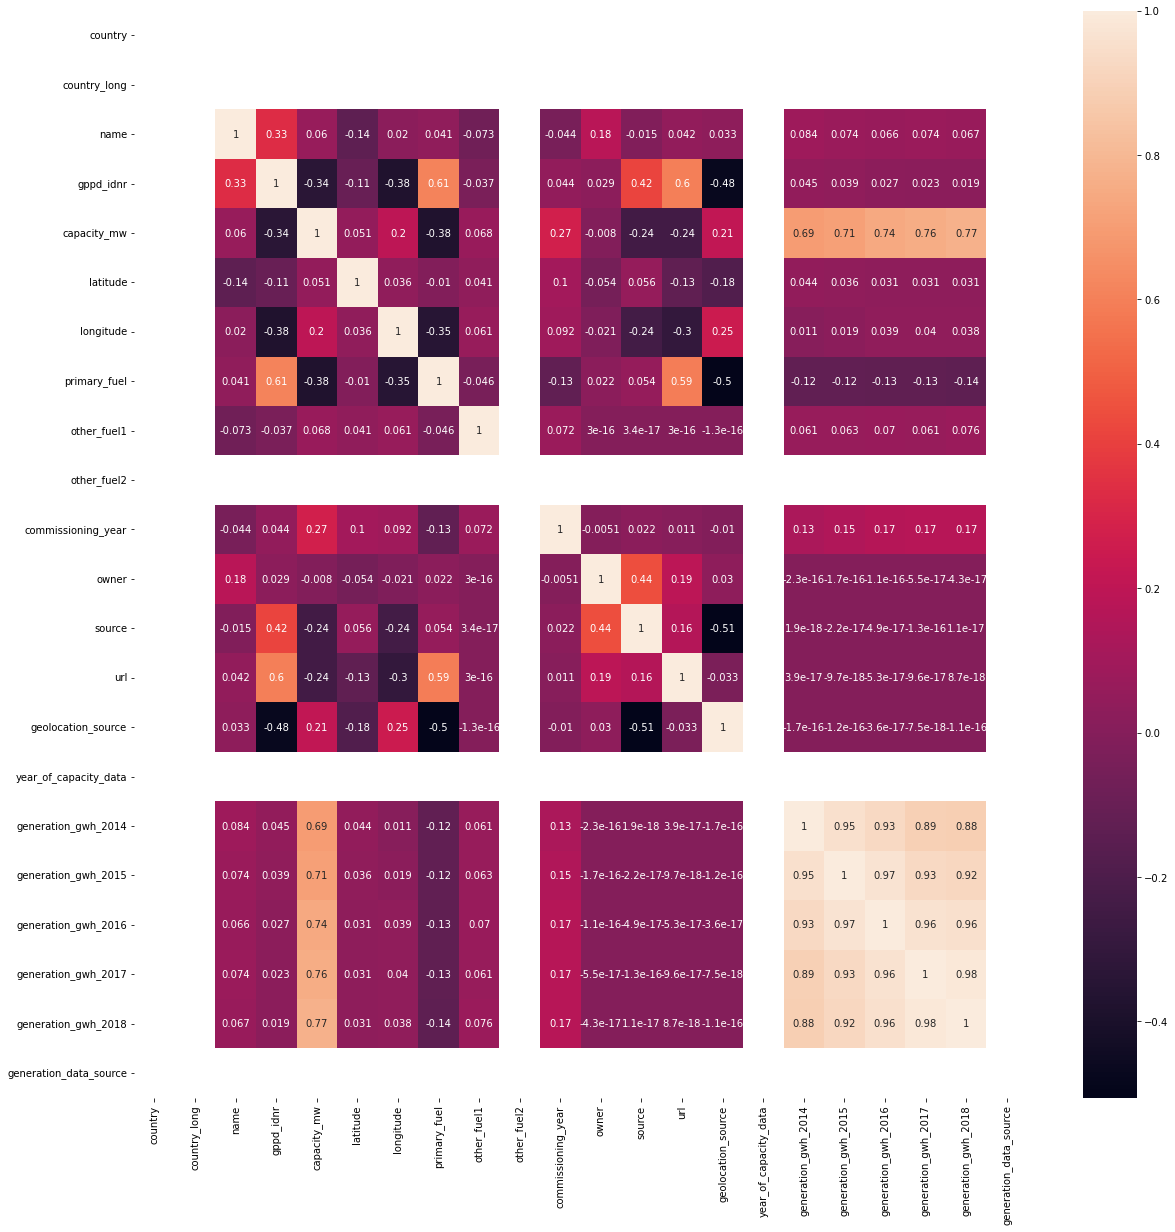

In [84]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
def vif_calc():
    vif=pd.DataFrame() 
    vif['VIF Factor']=[variance_inflation_factor(df1.values,i)for i in range(df1.shape[1])]
    vif['FEATURES']=df1.columns
    print(vif)

In [87]:
vif_calc()

      VIF Factor                FEATURES
0            NaN                 country
1            NaN            country_long
2       1.701236                    name
3       4.771885               gppd_idnr
4       4.656146             capacity_mw
5       1.116830                latitude
6       1.270963               longitude
7       4.369500            primary_fuel
8       1.028175             other_fuel1
9            NaN             other_fuel2
10      1.248068      commissioning_year
11      2.000176                   owner
12      3.826461                  source
13      3.033896                     url
14      3.558292      geolocation_source
15  29384.131882   year_of_capacity_data
16     11.293891     generation_gwh_2014
17     26.369908     generation_gwh_2015
18     33.596434     generation_gwh_2016
19     37.294171     generation_gwh_2017
20     33.351225     generation_gwh_2018
21           NaN  generation_data_source


# SKEW IS REMOVED

# REMOVING OUTLIERS

In [88]:
from scipy.stats import zscore
z=np.abs(zscore(df1))

In [89]:
dfnew=df1[(z<3).all(axis=1)]
dfnew.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source


# SINCE ZSCORE DOES NOT WORK HERE WE USE IQR METHOD

In [90]:
from scipy import stats
IQR = stats.iqr(df1)
IQR

1935.9569520202022

In [91]:
Q1 = df1.quantile()
Q3 = df1.quantile()
dfx = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [92]:
dfx.shape

(814, 22)

In [93]:
dfx.dtypes

country                   float64
country_long              float64
name                      float64
gppd_idnr                 float64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel              float64
other_fuel1               float64
other_fuel2               float64
commissioning_year        float64
owner                     float64
source                    float64
url                       float64
geolocation_source        float64
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source    float64
dtype: object

In [94]:
dfx.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

# SPLITTING X(INPUT VARIABLE) AND Y(OUTPUT VARIABLE)

In [95]:
x=dfx.drop(['primary_fuel'],axis=1)
y=dfx['primary_fuel']

In [96]:
x.shape

(814, 21)

In [97]:
y.shape

(814,)

# TRAINING AND TESTING

In [98]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [99]:
maxR2=0
maxRS=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    score=r2_score(y_test,predlr)
    print('r2_score of Linear Regression ' ,score,'at random_state ' ,i)
    if score>maxR2:
        maxR2=score
        maxRS=i
    print('Max r2_score of lr is ' ,maxR2 *100 ,'at random_state ',maxRS)    

r2_score of Linear Regression  0.7535540575286095 at random_state  0
Max r2_score of lr is  75.35540575286095 at random_state  0
r2_score of Linear Regression  0.7080388163775029 at random_state  1
Max r2_score of lr is  75.35540575286095 at random_state  0
r2_score of Linear Regression  0.7468346020609522 at random_state  2
Max r2_score of lr is  75.35540575286095 at random_state  0
r2_score of Linear Regression  0.7541805384819582 at random_state  3
Max r2_score of lr is  75.41805384819583 at random_state  3
r2_score of Linear Regression  0.7186596742440197 at random_state  4
Max r2_score of lr is  75.41805384819583 at random_state  3
r2_score of Linear Regression  0.7057234582423175 at random_state  5
Max r2_score of lr is  75.41805384819583 at random_state  3
r2_score of Linear Regression  0.7640897317556509 at random_state  6
Max r2_score of lr is  76.40897317556508 at random_state  6
r2_score of Linear Regression  0.697537211701908 at random_state  7
Max r2_score of lr is  76.408

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=194)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
score=r2_score(y_test,predlr)
print('R2_score of LinearRegression ' ,score*100)
print(mean_squared_error(y_test,predlr))
print(mean_absolute_error(y_test,predlr))

R2_score of LinearRegression  84.13907510394768
0.8530119908152046
0.7574799250731324


# REGULARISATION

In [101]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
l=Lasso()
r=Ridge()
en=ElasticNet()

In [102]:
models=[l,r,en]
for i in models:
    i.fit(x_train,y_train)
    alpha=[0.001,0.001,0.01,0.1,1]
    for j in alpha:
        predmodel=i.predict(x_test)
        print('R2_score : ' ,(r2_score(y_test,predmodel))*100, 'at model ',i,'with alpha ',j)
        print(mean_squared_error(y_test,predmodel))
        print(mean_absolute_error(y_test,predmodel))

R2_score :  64.75355094657709 at model  Lasso() with alpha  0.001
1.8955794742909402
1.0635264260636488
R2_score :  64.75355094657709 at model  Lasso() with alpha  0.001
1.8955794742909402
1.0635264260636488
R2_score :  64.75355094657709 at model  Lasso() with alpha  0.01
1.8955794742909402
1.0635264260636488
R2_score :  64.75355094657709 at model  Lasso() with alpha  0.1
1.8955794742909402
1.0635264260636488
R2_score :  64.75355094657709 at model  Lasso() with alpha  1
1.8955794742909402
1.0635264260636488
R2_score :  84.14383411393406 at model  Ridge() with alpha  0.001
0.8527560478226366
0.7571644081237721
R2_score :  84.14383411393406 at model  Ridge() with alpha  0.001
0.8527560478226366
0.7571644081237721
R2_score :  84.14383411393406 at model  Ridge() with alpha  0.01
0.8527560478226366
0.7571644081237721
R2_score :  84.14383411393406 at model  Ridge() with alpha  0.1
0.8527560478226366
0.7571644081237721
R2_score :  84.14383411393406 at model  Ridge() with alpha  1
0.8527560478

# TESTING MORE MODELS

In [103]:
 from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
knr=KNeighborsRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()
etr=ExtraTreesRegressor()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
svr=SVR()

In [104]:
model=[knr,gbr,abr,etr,rfr,dtr,svr]
for i in model:
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('R2_score of model ' , i ,'is = ',r2_score(y_test,predi)*100)

R2_score of model  KNeighborsRegressor() is =  87.98118832668487
R2_score of model  GradientBoostingRegressor() is =  96.75736353246387
R2_score of model  AdaBoostRegressor() is =  93.68709870544173
R2_score of model  ExtraTreesRegressor() is =  96.97287017985863
R2_score of model  RandomForestRegressor() is =  96.65356630974877
R2_score of model  DecisionTreeRegressor() is =  95.43704947861991
R2_score of model  SVR() is =  32.55096539636789


# CROSS_VALIDATION

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
for i in range(2,10):
    models=[lr,knr,gbr,abr,etr,rfr,dtr,svr]
    for j in models:
        j.fit(x_train,y_train)
        predj=j.predict(x_test)
        score=r2_score(y_test,predj)
        cross=cross_val_score(j,x_train,y_train,cv=i)
        print('R2_score of model ' ,j, 'is equal = ', score*100)
        print('Cross validation of model ',i, 'is equal = ',cross.mean())
        print('Diff between r2_score and cross_validation of model ' ,j,'is equal = ',score-cross.mean())

R2_score of model  LinearRegression() is equal =  84.13907510394768
Cross validation of model  2 is equal =  -8.268018312475547
Diff between r2_score and cross_validation of model  LinearRegression() is equal =  9.109409063515024
R2_score of model  KNeighborsRegressor() is equal =  87.98118832668487
Cross validation of model  2 is equal =  0.7492536910560104
Diff between r2_score and cross_validation of model  KNeighborsRegressor() is equal =  0.1305581922108383
R2_score of model  GradientBoostingRegressor() is equal =  96.75406972543821
Cross validation of model  2 is equal =  0.9057336220475722
Diff between r2_score and cross_validation of model  GradientBoostingRegressor() is equal =  0.061807075206809836
R2_score of model  AdaBoostRegressor() is equal =  94.2472240587171
Cross validation of model  2 is equal =  0.9033486096626796
Diff between r2_score and cross_validation of model  AdaBoostRegressor() is equal =  0.03912363092449134
R2_score of model  ExtraTreesRegressor() is equal

# FROM THE ABOVE WE CAN UNDERSTAND GRADIENT BOOSTING REGRESSOR,EXTRA TREES REGRESSOR AND RANDOM FOREST REGRESSOR SHOWS GOOD RESULTS SO WE HYPERTUNE THEM

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
mod=[gbr,etr,rfr]
parameters={'n_estimators':[50,100,150,200],
            'criterion':['mae','mse'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}

In [109]:
gscvetr=GridSearchCV(estimator=etr,param_grid=parameters)
gscvetr.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mae', 'mse'], 'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [110]:
print(gscvetr.best_score_)
print(gscvetr.best_estimator_)
print(gscvetr.best_params_)

0.8051638328449144
ExtraTreesRegressor(criterion='mae', max_depth=3, max_features='auto',
                    n_estimators=50)
{'criterion': 'mae', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 50}


In [111]:
gscvrfr=GridSearchCV(estimator=rfr,param_grid=parameters)
gscvrfr.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mae', 'mse'], 'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [112]:
print(gscvrfr.best_score_)
print(gscvrfr.best_estimator_)
print(gscvrfr.best_params_)

0.9252990862080954
RandomForestRegressor(criterion='mse', max_depth=3, max_features='auto',
                      n_estimators=50)
{'criterion': 'mse', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 50}


In [113]:
gscvgbr=GridSearchCV(estimator=gbr,param_grid=parameters)
gscvgbr.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mae', 'mse'], 'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [114]:
print(gscvgbr.best_score_)
print(gscvgbr.best_estimator_)
print(gscvgbr.best_params_)

0.934103555830865
GradientBoostingRegressor(criterion='mse', max_features='sqrt',
                          n_estimators=200)
{'criterion': 'mse', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}


# GRADIENT BOOSTING REGRESSOR TOPS ALL MODELS 

In [119]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
score=r2_score(y_test,predgbr)
print('The r2_score of the best model GradientBoostingRegressor ' ,score*100)
print(mean_squared_error(y_test,predgbr))
print(mean_absolute_error(y_test,predgbr))

The r2_score of the best model GradientBoostingRegressor  96.71760260114168
0.17652970165337978
0.21177352290351198


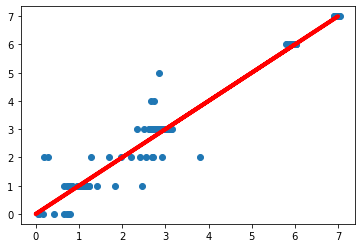

In [120]:
plt.scatter(predgbr,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

Most points runs within the range , so we conclude the best the model and save it

# SAVING THE BEST MODEL

In [121]:
import pickle

In [122]:
filename='global_power_plant_database1-primary_fuel.pkl'
pickle.dump(gbr,open(filename,'wb'))

# LOADING THE SAVED MODEL

In [123]:
pickle.load(open(filename,'rb'))

GradientBoostingRegressor()

# THE ABOVE RESULT IS FOR THE TARGET --- PRIMARY_FUEL 

# CONSIDERING THE NEXT TARGET AS CAPACITY_MW

In [125]:
x1=dfx.drop(['capacity_mw'],axis=1)
y1=dfx['capacity_mw']

In [126]:
x1.shape

(814, 21)

In [127]:
y1.shape

(814,)

# TRAINING AND TESTING

In [128]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [129]:
maxR2=0
maxRS=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    score=r2_score(y_test,predlr)
    print('r2_score of Linear Regression ' ,score,'at random_state ' ,i)
    if score>maxR2:
        maxR2=score
        maxRS=i
    print('Max r2_score of lr is ' ,maxR2 *100 ,'at random_state ',maxRS)  

r2_score of Linear Regression  0.37326997463178335 at random_state  0
Max r2_score of lr is  37.32699746317834 at random_state  0
r2_score of Linear Regression  0.3435545030537549 at random_state  1
Max r2_score of lr is  37.32699746317834 at random_state  0
r2_score of Linear Regression  0.3254041976776447 at random_state  2
Max r2_score of lr is  37.32699746317834 at random_state  0
r2_score of Linear Regression  0.3229113968801596 at random_state  3
Max r2_score of lr is  37.32699746317834 at random_state  0
r2_score of Linear Regression  0.34221467975387077 at random_state  4
Max r2_score of lr is  37.32699746317834 at random_state  0
r2_score of Linear Regression  0.20771100665415165 at random_state  5
Max r2_score of lr is  37.32699746317834 at random_state  0
r2_score of Linear Regression  0.33769009093522095 at random_state  6
Max r2_score of lr is  37.32699746317834 at random_state  0
r2_score of Linear Regression  0.14872771545410146 at random_state  7
Max r2_score of lr is  

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=764)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
score=r2_score(y_test,predlr)
print('R2_score of LinearRegression ' ,score*100)
print(mean_squared_error(y_test,predlr))
print(mean_absolute_error(y_test,predlr))

R2_score of LinearRegression  46.20529429920739
45547.991669763986
147.9479992416646


# REGULARISATION

In [132]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
l=Lasso()
r=Ridge()
en=ElasticNet()

In [133]:
models=[l,r,en]
for i in models:
    i.fit(x_train,y_train)
    alpha=[0.001,0.001,0.01,0.1,1]
    for j in alpha:
        predmodel=i.predict(x_test)
        print('R2_score : ' ,(r2_score(y_test,predmodel))*100, 'at model ',i,'with alpha ',j)
        print(mean_squared_error(y_test,predmodel))
        print(mean_absolute_error(y_test,predmodel))

R2_score :  46.200786784393074 at model  Lasso() with alpha  0.001
45551.8081837599
147.7196091309705
R2_score :  46.200786784393074 at model  Lasso() with alpha  0.001
45551.8081837599
147.7196091309705
R2_score :  46.200786784393074 at model  Lasso() with alpha  0.01
45551.8081837599
147.7196091309705
R2_score :  46.200786784393074 at model  Lasso() with alpha  0.1
45551.8081837599
147.7196091309705
R2_score :  46.200786784393074 at model  Lasso() with alpha  1
45551.8081837599
147.7196091309705
R2_score :  46.2108485682293 at model  Ridge() with alpha  0.001
45543.2888687012
147.92763246094935
R2_score :  46.2108485682293 at model  Ridge() with alpha  0.001
45543.2888687012
147.92763246094935
R2_score :  46.2108485682293 at model  Ridge() with alpha  0.01
45543.2888687012
147.92763246094935
R2_score :  46.2108485682293 at model  Ridge() with alpha  0.1
45543.2888687012
147.92763246094935
R2_score :  46.2108485682293 at model  Ridge() with alpha  1
45543.2888687012
147.92763246094935

# TESTING WITH MORE MODELS

In [134]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
knr=KNeighborsRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()
etr=ExtraTreesRegressor()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
svr=SVR()

In [135]:
model=[knr,gbr,abr,etr,rfr,dtr,svr]
for i in model:
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('R2_score of model ' , i ,'is = ',r2_score(y_test,predi)*100)

R2_score of model  KNeighborsRegressor() is =  63.86176159841451
R2_score of model  GradientBoostingRegressor() is =  64.99303258398908
R2_score of model  AdaBoostRegressor() is =  37.097615315381695
R2_score of model  ExtraTreesRegressor() is =  76.21139019942356
R2_score of model  RandomForestRegressor() is =  70.80556488021514
R2_score of model  DecisionTreeRegressor() is =  31.712203042518716
R2_score of model  SVR() is =  -28.40210683123874


# CROSS-VALIDATION

In [136]:
from sklearn.model_selection import cross_val_score

In [137]:
for i in range(2,10):
    models=[lr,knr,gbr,abr,etr,rfr,dtr,svr]
    for j in models:
        j.fit(x_train,y_train)
        predj=j.predict(x_test)
        score=r2_score(y_test,predj)
        cross=cross_val_score(j,x_train,y_train,cv=i)
        print('R2_score of model ' ,j, 'is equal = ', score*100)
        print('Cross validation of model ',i, 'is equal = ',cross.mean())
        print('Diff between r2_score and cross_validation of model ' ,j,'is equal = ',score-cross.mean())

R2_score of model  LinearRegression() is equal =  46.20529429920739
Cross validation of model  2 is equal =  -19.784617629344226
Diff between r2_score and cross_validation of model  LinearRegression() is equal =  20.2466705723363
R2_score of model  KNeighborsRegressor() is equal =  63.86176159841451
Cross validation of model  2 is equal =  0.4446910314843172
Diff between r2_score and cross_validation of model  KNeighborsRegressor() is equal =  0.19392658449982791
R2_score of model  GradientBoostingRegressor() is equal =  66.59886378383854
Cross validation of model  2 is equal =  0.512550244824532
Diff between r2_score and cross_validation of model  GradientBoostingRegressor() is equal =  0.1534383930138533
R2_score of model  AdaBoostRegressor() is equal =  37.813672626502296
Cross validation of model  2 is equal =  0.02478536310606938
Diff between r2_score and cross_validation of model  AdaBoostRegressor() is equal =  0.35335136315895355
R2_score of model  ExtraTreesRegressor() is equa

# FROM THE ABOVE WE CAN CONCLUDE THAT EXTRA TREES SHOWS BETTER RESULT

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
etr=ExtraTreesRegressor()
parameters={'n_estimators':[50,100,150,200],
            'criterion':['mae','mse'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}

In [140]:
gscvetr=GridSearchCV(estimator=etr,param_grid=parameters)
gscvetr.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mae', 'mse'], 'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [141]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
predetr=etr.predict(x_test)
score=r2_score(y_test,predetr)
print('The r2_score of the best model GradientBoostingRegressor ' ,score*100)
print(mean_squared_error(y_test,predetr))
print(mean_absolute_error(y_test,predetr))

The r2_score of the best model GradientBoostingRegressor  76.45443155877743
19936.03908134889
84.84980944785275


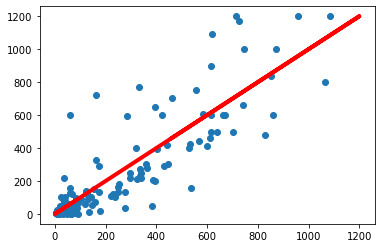

In [142]:
plt.scatter(predetr,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# SAVING THE BEST MODEL

In [143]:
import pickle

In [144]:
filename='global_power_plant_database1-capacity_mw.pkl'
pickle.dump(etr,open(filename,'wb'))

# LOADING THE BEST MODEL

In [145]:
pickle.load(open(filename,'rb'))

ExtraTreesRegressor()